In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df=pd.read_csv(r'/content/mission1_data.csv')

In [5]:
df.head()

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score
0,Male,High School,Standard,NaN,10,7,88,94,72
1,Male,High School,Standard,NaN,1,3,67,80,95
2,Male,Bachelor,Free/Reduced,NaN,1,6,84,100,76
3,Male,Associate,Free/Reduced,Completed,1,1,60,92,64
4,Female,Associate,Free/Reduced,NaN,2,0,72,92,99


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    1000 non-null   object
 1   Parental Education Level  1000 non-null   object
 2   Lunch Type                1000 non-null   object
 3   Test Preparation Course   574 non-null    object
 4   Study Time                1000 non-null   int64 
 5   Absences                  1000 non-null   int64 
 6   Math Score                1000 non-null   int64 
 7   Reading Score             1000 non-null   int64 
 8   Writing Score             1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
df.isnull().sum()

,0
Gender,0
Parental Education Level,0
Lunch Type,0
Test Preparation Course,426
Study Time,0
Absences,0
Math Score,0
Reading Score,0
Writing Score,0


In [8]:
df.duplicated().sum()

900

In [9]:
df['Test Preparation Course']=df['Test Preparation Course'].fillna('Not Complete')

In [10]:
df['Total Score']=df['Math Score']+df['Reading Score']+df['Writing Score']

<Axes: xlabel='Math Score', ylabel='Count'>

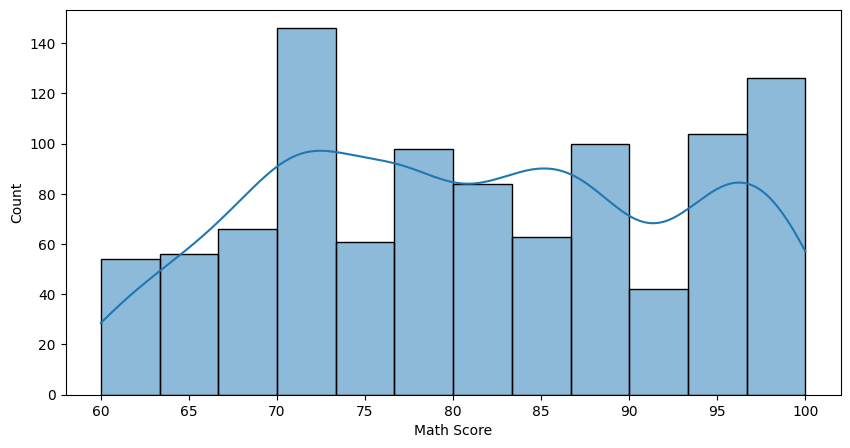

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(x='Math Score',kde=True,data=df)

<Axes: xlabel='Total Score', ylabel='Math Score'>

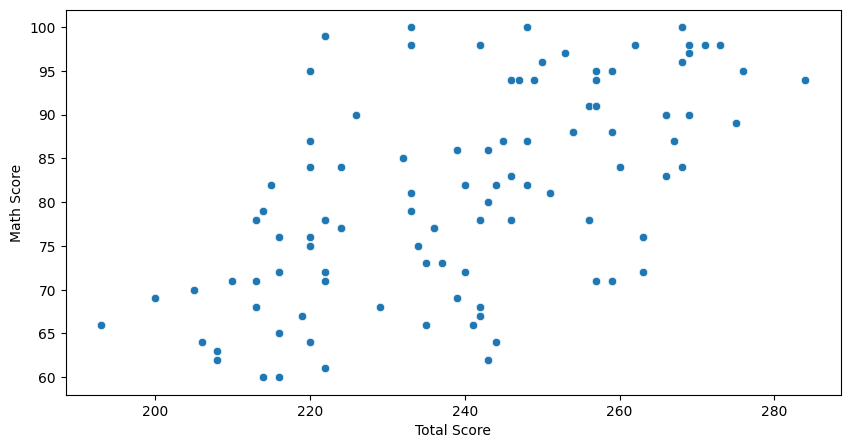

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total Score',y='Math Score',data=df)

<Axes: xlabel='Study Time', ylabel='Reading Score'>

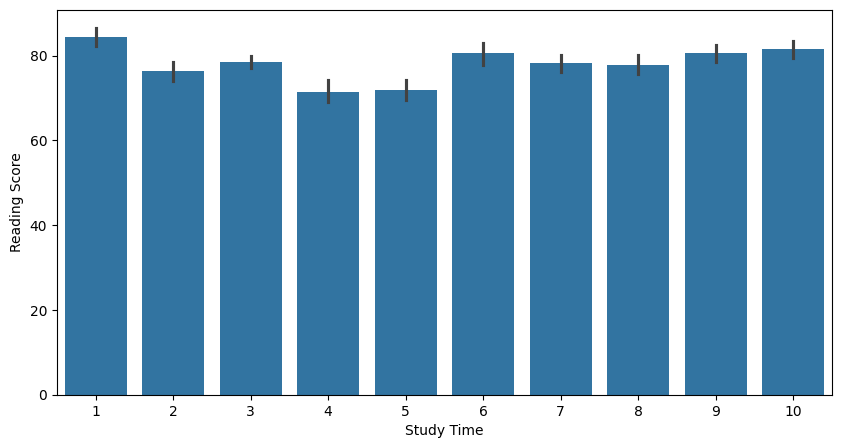

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x='Study Time',y='Reading Score',data=df)

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [15]:
df

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score,Total Score
0,Male,High School,Standard,Not Complete,10,7,88,94,72,254
1,Male,High School,Standard,Not Complete,1,3,67,80,95,242
2,Male,Bachelor,Free/Reduced,Not Complete,1,6,84,100,76,260
3,Male,Associate,Free/Reduced,Completed,1,1,60,92,64,216
4,Female,Associate,Free/Reduced,Not Complete,2,0,72,92,99,263
...,...,...,...,...,...,...,...,...,...,...
995,Male,Master,Free/Reduced,Completed,6,5,91,95,71,257
996,Male,Master,Free/Reduced,Completed,10,0,88,85,86,259
997,Male,Master,Free/Reduced,Completed,1,6,89,90,96,275
998,Female,Master,Standard,Completed,10,8,84,99,85,268


In [16]:
encode_cols=['Gender','Parental Education Level','Lunch Type','Test Preparation Course']
le = {}
for col in encode_cols:
  le[col] = LabelEncoder()
  df[col] = le[col].fit_transform(df[col])

In [17]:
x=df.drop(['Total Score'],axis=1)
y=df['Total Score']

In [18]:
scale_Cols = ['Study Time', 'Absences', 'Math Score', 'Reading Score', 'Writing Score']
scaler = StandardScaler()
df[scale_Cols] = scaler.fit_transform(df[scale_Cols])


In [19]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [21]:
dt.score(X_test,y_test)

1.0

In [22]:
y_pred=dt.predict(X_test)

In [23]:
mse(y_test,y_pred)

0.0

In [24]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [25]:
rf.score(X_test,y_test)

0.9997204422989008

In [26]:
y_pred_fr=rf.predict(X_test)

In [27]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [28]:
dt_param={'max_depth':[3,5,10,None] , 'max_leaf_nodes':[2,5,7]}

In [29]:
grid_search_CV = GridSearchCV(dt,dt_param,cv=5)
grid_search_CV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_leaf_nodes': [2, 5, 7]})

In [30]:
print(grid_search_CV.best_params_)

{'max_depth': 3, 'max_leaf_nodes': 7}


In [31]:
df['Test Preparation Course'].value_counts()

,count
Test Preparation Course,
0,574
1,426


In [34]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [36]:
import gradio as gr

In [37]:

def Predict_total_score(Gender, Parental_Education_Level, Lunch_Type, Test_Preparation_Course, Study_Time, Absences, Math_Score, Reading_Score, Writing_Score):
  try:
    input_data = pd.DataFrame({
        'Gender': [Gender],
        'Parental Education Level': [Parental_Education_Level],
        'Lunch Type': [Lunch_Type],
        'Test Preparation Course': [Test_Preparation_Course],
        'Study Time': [Study_Time],
        'Absences': [Absences],
        'Math Score': [Math_Score],
        'Reading Score': [Reading_Score],
        'Writing Score': [Writing_Score]
    })
    for col in encode_cols:
      input_data[col] = le[col].transform(input_data[col])
    input_data[scale_Cols] = scaler.transform(input_data[scale_Cols])
    # Predict
    prediction = rf.predict(input_data)
    return f"Predicted Total Score: {prediction[0]:,.2f}"
  except Exception as e:
    return f"Error: {str(e)}"

# Gradio interface
gr.Interface(
    fn=Predict_total_score,
    inputs=[
        gr.Dropdown(choices=['Male', 'Female'], label='Gender'),
        gr.Dropdown(choices=['High School', 'Some High School', 'Bachelor', 'Master'], label='Parental Education Level'),
        gr.Dropdown(choices=['Free/Reduced', 'Standard'], label='Lunch Type'),
        gr.Dropdown(choices=['Complete', 'Not Complete'], label='Test Preparation Course'),
        gr.Number(label='Study Time'),
        gr.Number(label='Absences'),
        gr.Number(label='Math Score'),
        gr.Number(label='Reading Score'),
        gr.Number(label='Writing Score')
    ],
    outputs=gr.Textbox(label="Predicted Total Score"),
    title="Student Performance Prediction",
    description="Predict a student's total score based on various factors"
).launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://26e97d2ed922d757fb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
